In [1]:
# Importing libraries

import seaborn as sns
import numpy as np
from scipy import stats, signal
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
chondrites = np.array([20.77, 22.56, 22.71, 22.99, 26.39, 27.08, 27.32, 27.33, 27.57, 27.81, 28.69,
29.36, 30.25, 31.89, 32.88, 33.23, 33.28, 33.40, 33.52, 33.83, 33.95, 34.82])

In [85]:
def find_critical_value(data, searchMax, searchStep, k):
    
    # Find original h_crit
    h_crit = binary_search(data, searchMax, searchStep, k)
        
    # Resampling from KDE distribution of data with BW = h_crit
    X = stats.gaussian_kde(dataset=data, bw_method=h_crit).resample()[0]
    
    # Finding new h_crit value for X
    new_h_crit = binary_search(X, searchMax, searchStep, k)
    
    return new_h_crit

In [120]:
def find_maxima(data, h):
    
    plt.clf()
    x_vals, y_vals = sns.kdeplot(data, bw=h).get_lines()[0].get_data()
    maxima = signal.argrelmax(y_vals)[0].tolist()
    maxima_centers = [x_vals[i] for i in maxima]
    
    return len(maxima), maxima_centers

In [86]:
def binary_search(data, searchMax, searchStep, k):
    
    searchList = np.arange(0, searchMax, searchStep)
    start = 0
    end = len(searchList) - 1
    found = False
    found_h = 12345
    
    while (start <= end) and (found==False):
        midpoint = int((start+end)/2)
        prop_h = searchList[midpoint]
        
        if find_maxima(data, prop_h)[0] == k:
            check_h = searchList[midpoint-1]
            if find_maxima(data, check_h)[0] == k:
                end = midpoint - 1
            else:
                found_h = prop_h
                found = True
        
        elif find_maxima(data, prop_h)[0] > k:
            start = midpoint + 1
        
        elif find_maxima(data, prop_h)[0] < k:
            end = midpoint - 1
    
    return found_h

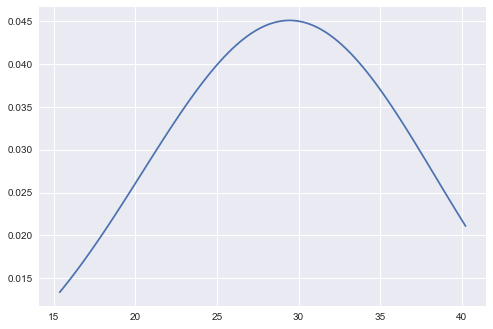

In [121]:
plt.clf()
sns.kdeplot(chondrites, kernel='gau', bw=1.80)
#for loc in [20.765959595959593, 22.689696969696968, 27.425050505050503, 29.05282828282828, 33.492222222222217]:
#    plt.axvline(x=loc, color='r')
plt.show()

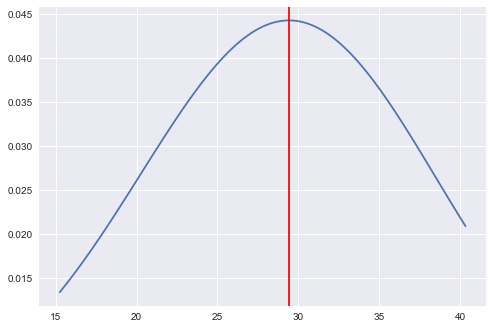

In [145]:
h=1.84

_, locList = find_maxima(chondrites, h)

plt.clf()
sns.kdeplot(chondrites, kernel = 'gau', bw=h)
for loc in locList:
    plt.axvline(x=loc, color='r')
plt.show()

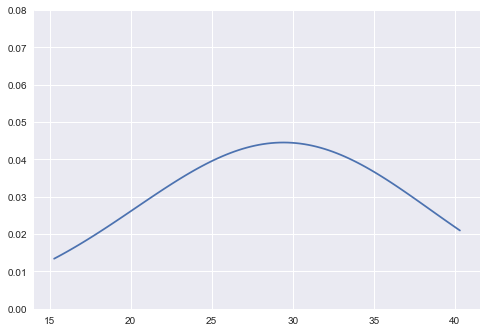

In [144]:
sns.kdeplot(chondrites, bw=1.83)
plt.ylim([0, .08])
plt.show()

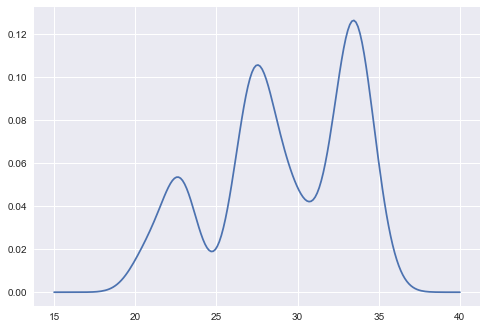

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
data = chondrites
density = gaussian_kde(data)
xs = np.linspace(15,40,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

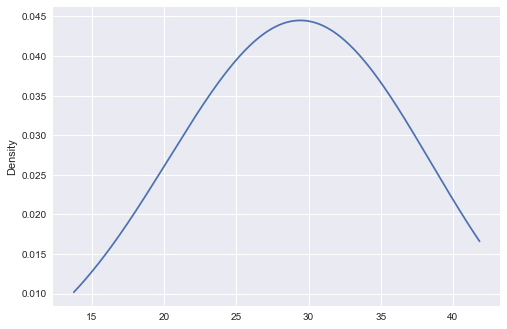

In [135]:
chondritesdf = pd.DataFrame(data=chondrites)
chondritesdf[0].plot.density(bw_method=1.83) 
plt.show()

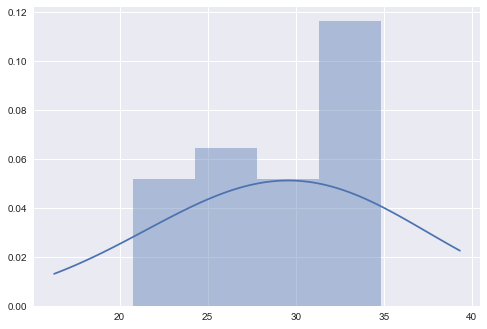

In [143]:
sns.distplot(chondrites, kde=True, kde_kws={'bw': 1.5})
plt.show()

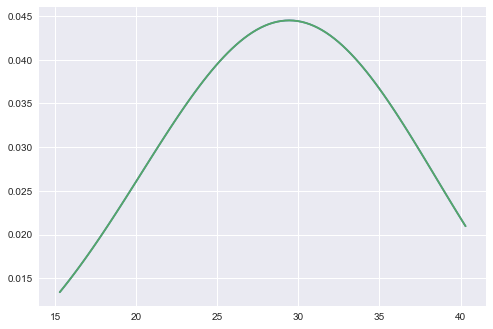

In [147]:
sns.kdeplot(chondrites, bw=1.83)
plt.show()

In [76]:
find_critical_value(chondrites, 10, 0.01, 2)

0.31

In [84]:
def bootstrap(data, searchMax, searchStep, k, num_simulations):
    
    hlist = []

    for i in range(0, num_simulations):
        print(i)
        hlist = hlist + [find_critical_value(chondrites, 10, 0.01, 2)]
        #modesList = [find_maxima(chondrites, h)[0] for h in hlist]
        
    return hlist, modesList

In [87]:
hlist, modesList = bootstrap(chondrites, 10, 0.01, 2, 50)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [90]:
filtered_hlist = [x for x in hlist if x!=12345]
modesList = [find_maxima(chondrites, x)[0] for x in filtered_hlist]

In [94]:
find_maxima(chondrites, 0.41)

(3, [22.875353535353533, 27.878383838383836, 33.214949494949494])

In [92]:
hlist

[0.37,
 0.32000000000000001,
 0.45000000000000001,
 0.41000000000000003,
 0.31,
 0.32000000000000001,
 0.31,
 0.37,
 0.28000000000000003,
 0.32000000000000001,
 0.28999999999999998,
 0.29999999999999999,
 12345,
 0.38,
 0.35000000000000003,
 0.27000000000000002,
 0.32000000000000001,
 0.38,
 0.19,
 0.28999999999999998,
 0.32000000000000001,
 0.23000000000000001,
 0.27000000000000002,
 0.27000000000000002,
 0.41000000000000003,
 0.28000000000000003,
 0.27000000000000002,
 0.23000000000000001,
 0.31,
 0.25,
 0.37,
 0.37,
 0.34000000000000002,
 0.26000000000000001,
 0.35000000000000003,
 0.35000000000000003,
 0.23999999999999999,
 0.26000000000000001,
 0.39000000000000001,
 0.32000000000000001,
 0.23000000000000001,
 12345,
 0.28000000000000003,
 0.31,
 0.40000000000000002,
 0.31,
 0.28000000000000003,
 0.27000000000000002,
 0.37,
 0.26000000000000001]

In [91]:
modesList

[3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]